In [2]:
import pandas as pd

food = pd.read_csv('data/food.csv')
food_nutrient = pd.read_csv('data/food_nutrient.csv')
nutrient = pd.read_csv('data/nutrient.csv')
food_category = pd.read_csv('data/food_category.csv')


C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\1914521746.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  food_nutrient = pd.read_csv('data/food_nutrient.csv')


In [3]:
import os
print(os.listdir('data'))


['food.csv', 'food_category.csv', 'food_nutrient.csv', 'nutrient.csv']


In [4]:
print("Food:")
display(food.head())

print("Food Nutrient:")
display(food_nutrient.head())

print("Nutrient:")
display(nutrient.head())

print("Food Category:")
display(food_category.head())


Food:


,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
3,319877,sub_sample_food,Hummus,16.0,2019-04-01
4,319878,sub_sample_food,Hummus,16.0,2019-04-01


Food Nutrient:


,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,2201847,319877,1051,56.30,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2201845,319877,1002,1.28,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2201846,319877,1004,19.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2201844,319877,1007,1.98,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2201852,319878,1091,188.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN


Nutrient:


,id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957.0,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958.0,290.0
2,1001,Solids,G,201.0,200.0
3,1002,Nitrogen,G,202.0,500.0
4,1003,Protein,G,203.0,600.0


Food Category:


,id,code,description
0,1,100,Dairy and Egg Products
1,2,200,Spices and Herbs
2,3,300,Baby Foods
3,4,400,Fats and Oils
4,5,500,Poultry Products


In [5]:
protein_rows = food_nutrient[food_nutrient['nutrient_id'] == 1003]
print(protein_rows.head())
print(f"Number of protein records: {len(protein_rows)}")


           id  fdc_id  nutrient_id  amount  data_points  derivation_id  min  \
2105  2204224  320356         1003    23.4          1.0            1.0  NaN   
2119  2204238  320383         1003    23.9          1.0            1.0  NaN   
2150  2204272  320389         1003    23.5          1.0            1.0  NaN   
2154  2204276  320391         1003    23.8          1.0            1.0  NaN   
2160  2204280  320393         1003    23.8          1.0            1.0  NaN   

      max  median footnote  min_year_acquired  
2105  NaN     NaN      NaN                NaN  
2119  NaN     NaN      NaN                NaN  
2150  NaN     NaN      NaN                NaN  
2154  NaN     NaN      NaN                NaN  
2160  NaN     NaN      NaN                NaN  
Number of protein records: 1376


In [ ]:
# Merge protein rows with food table to get food names
protein_data = protein_rows.merge(food, on='fdc_id', how='left')

# Merge with food_category to get readable category names
protein_data = protein_data.merge(food_category, left_on='food_category_id', right_on='id', how='left', suffixes=('', '_category'))

# Keep only relevant columns: Food Name, Protein Amount, and Category Name
protein_data = protein_data[['description', 'amount', 'description_category']]
protein_data.columns = ['Food Name', 'Protein (g)', 'Food Category Name']

# Drop rows with missing protein amounts
protein_data.dropna(subset=['Protein (g)'], inplace=True)

# Show cleaned dataset
protein_data.head(10)


,Food Name,Protein (g),Food_Category,Category Name
0,"Proximates, Beef, Eye of Round roast/steak, le...",23.4,13.0,Beef Products
1,"Proximates, Beef, Eye of Round roast/steak, le...",23.9,13.0,Beef Products
2,"Proximates, Beef, Eye of Round roast/steak, le...",23.5,13.0,Beef Products
3,"Proximates, Beef, Eye of Round roast/steak, le...",23.8,13.0,Beef Products
4,"Proximates, Beef, Eye of Round roast/steak, le...",23.8,13.0,Beef Products
5,"Proximates, Beef, Eye of Round roast/steak, le...",24.0,13.0,Beef Products
6,"Proximates, Beef, Eye of Round roast/steak, le...",23.9,13.0,Beef Products
7,"Proximates, Beef, Eye of Round roast/steak, le...",23.3,13.0,Beef Products
8,"Proximates, Beef, Eye of Round roast/steak, le...",22.9,13.0,Beef Products
9,"Proximates, Beef, Eye of Round roast/steak, le...",23.3,13.0,Beef Products


In [50]:
# Check columns after merging
print("Columns after merge:")
print(protein_data.columns)

# Show 5 rows to verify
protein_data.head()


Columns after merge:
Index(['Food Name', 'Protein (g)', 'Food_Category', 'Category Name'], dtype='object')


,Food Name,Protein (g),Food_Category,Category Name
0,"Proximates, Beef, Eye of Round roast/steak, le...",23.4,13.0,Beef Products
1,"Proximates, Beef, Eye of Round roast/steak, le...",23.9,13.0,Beef Products
2,"Proximates, Beef, Eye of Round roast/steak, le...",23.5,13.0,Beef Products
3,"Proximates, Beef, Eye of Round roast/steak, le...",23.8,13.0,Beef Products
4,"Proximates, Beef, Eye of Round roast/steak, le...",23.8,13.0,Beef Products


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(14, 6))

# Create boxplot
sns.boxplot(data=protein_data, x='Category', y='Protein (g)')

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.title('Protein Content Distribution by Food Category')
plt.tight_layout()

# Show plot
plt.show()


ValueError: Could not interpret value `Category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x600 with 0 Axes>

In [10]:
# Top 10 highest protein foods
top_protein = protein_data.sort_values(by='Protein (g)', ascending=False).head(10)

# Display
top_protein


,Food Name,Protein (g),Category
26,"Egg, white, dried",79.9,Dairy and Egg Products
1133,"Flour, soy, defatted",51.1,Legumes and Legume Products
54,"Egg, whole, dried",48.1,Dairy and Egg Products
1108,"Pork, cured, bacon, cooked, restaurant",40.9,Pork Products
1134,"Flour, soy, full-fat",38.6,Legumes and Legume Products
56,"Egg, yolk, dried",34.2,Dairy and Egg Products
122,"Chicken, broiler or fryers, breast, skinless, ...",32.1,Poultry Products
957,"Beans, Dry, Great Northern, 446 (0% moisture)",31.6,Legumes and Legume Products
583,"Beans, Dry, Pinto, 468 (0% moisture)",30.8,Legumes and Legume Products
960,"Beans, Dry, Great Northern, 579 (0% moisture)",30.5,Legumes and Legume Products


In [11]:
from IPython.display import display, Markdown

display(Markdown("### Top 10 Highest Protein Foods\n\nHere is the sorted table of top protein foods:"))
display(top_protein)


### Top 10 Highest Protein Foods

Here is the sorted table of top protein foods:

,Food Name,Protein (g),Category
26,"Egg, white, dried",79.9,Dairy and Egg Products
1133,"Flour, soy, defatted",51.1,Legumes and Legume Products
54,"Egg, whole, dried",48.1,Dairy and Egg Products
1108,"Pork, cured, bacon, cooked, restaurant",40.9,Pork Products
1134,"Flour, soy, full-fat",38.6,Legumes and Legume Products
56,"Egg, yolk, dried",34.2,Dairy and Egg Products
122,"Chicken, broiler or fryers, breast, skinless, ...",32.1,Poultry Products
957,"Beans, Dry, Great Northern, 446 (0% moisture)",31.6,Legumes and Legume Products
583,"Beans, Dry, Pinto, 468 (0% moisture)",30.8,Legumes and Legume Products
960,"Beans, Dry, Great Northern, 579 (0% moisture)",30.5,Legumes and Legume Products


### Visualization: Top 10 Protein Foods

This horizontal bar chart shows the top 10 foods ranked by protein content. **Egg white, dried** stands out as the most protein-dense food with nearly 80g per 100g, followed by **soy flour (defatted)** and **whole dried egg**.

C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\837228718.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


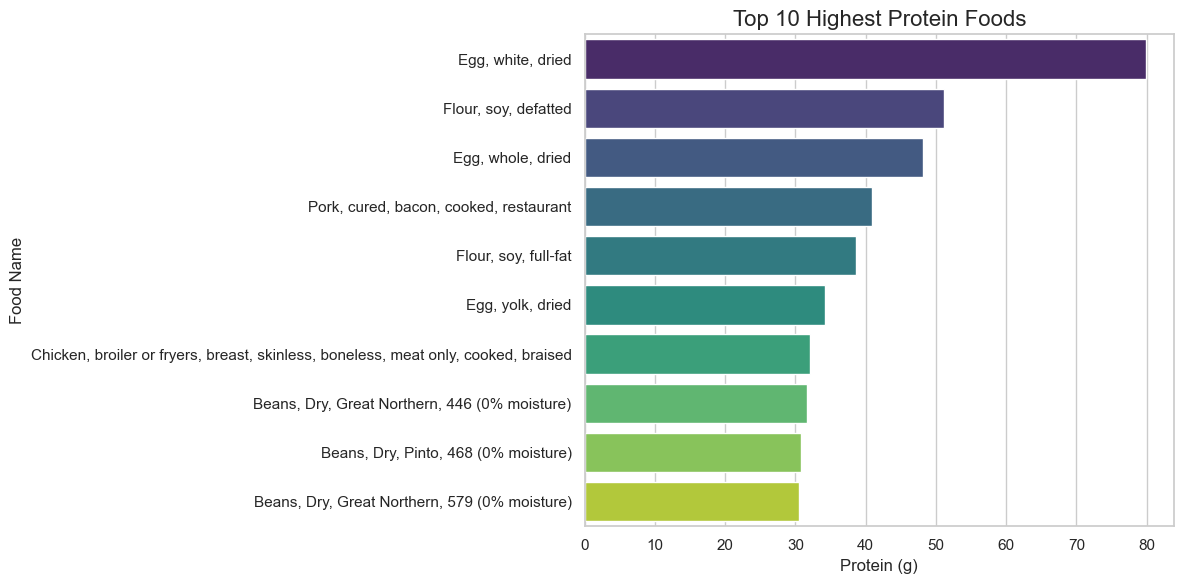

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Show markdown description
display(Markdown("### Visualization: Top 10 Protein Foods\n\nThis horizontal bar chart shows the top 10 foods ranked by protein content. **Egg white, dried** stands out as the most protein-dense food with nearly 80g per 100g, followed by **soy flour (defatted)** and **whole dried egg**."))

# Plot chart
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=top_protein,
    y="Food Name",
    x="Protein (g)",
    palette="viridis"
)
plt.title("Top 10 Highest Protein Foods", fontsize=16)
plt.xlabel("Protein (g)")
plt.ylabel("Food Name")
plt.tight_layout()
plt.show()


In [15]:
# Group by category and calculate mean protein content
avg_protein_by_category = protein_data.groupby("Category")["Protein (g)"].mean().sort_values(ascending=False)

# Convert to DataFrame for display
avg_protein_df = avg_protein_by_category.reset_index()

# Display the result
from IPython.display import display, Markdown

display(Markdown("### Average Protein Content by Category\n\nThe table below shows the average protein content per 100g for each food category in the dataset, sorted from highest to lowest."))
display(avg_protein_df.head(10))  # top 10 categories


### Average Protein Content by Category

The table below shows the average protein content per 100g for each food category in the dataset, sorted from highest to lowest.

,Category,Protein (g)
0,Beef Products,24.333600
1,Legumes and Legume Products,23.861913
2,Poultry Products,23.197614
3,Pork Products,22.716964
4,"Lamb, Veal, and Game Products",18.671875
5,Finfish and Shellfish Products,17.597500
6,Nut and Seed Products,17.490556
7,Sausages and Luncheon Meats,16.340000
8,Dairy and Egg Products,13.883290
9,Cereal Grains and Pasta,10.797883


C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\1473583780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


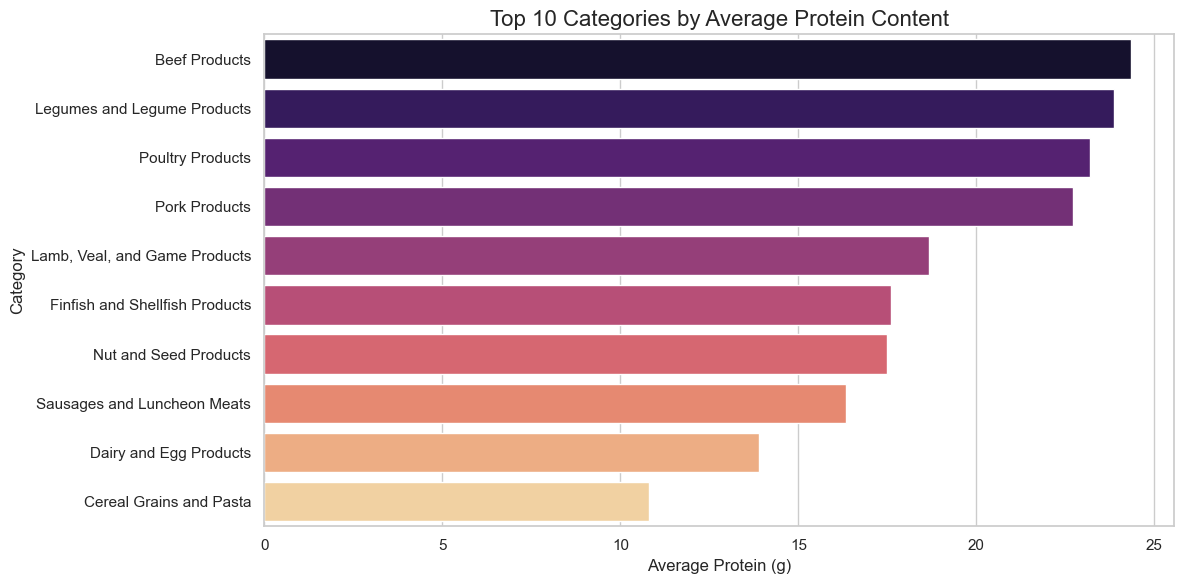

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_protein_df.head(10),
    x="Protein (g)",
    y="Category",
    palette="magma"
)
plt.title("Top 10 Categories by Average Protein Content", fontsize=16)
plt.xlabel("Average Protein (g)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [17]:
display(Markdown("### Visualization: Average Protein by Category\n\nThis chart highlights which food categories tend to be most protein-rich on average. **Legumes and Legume Products** and **Poultry Products** are among the top categories, reflecting their nutritional density."))


### Visualization: Average Protein by Category

This chart highlights which food categories tend to be most protein-rich on average. **Legumes and Legume Products** and **Poultry Products** are among the top categories, reflecting their nutritional density.

C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\3381647385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


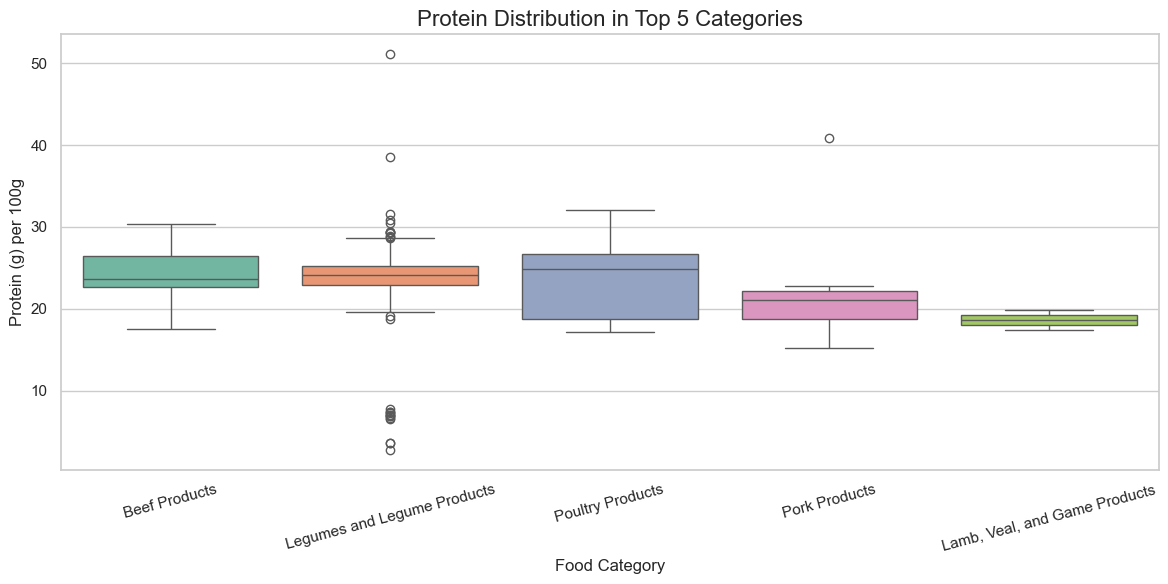

In [18]:
# Get top 5 categories by average protein
top5_categories = avg_protein_df.head(5)["Category"].tolist()

# Filter original data to include only those categories
top5_data = protein_data[protein_data["Category"].isin(top5_categories)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=top5_data,
    x="Category",
    y="Protein (g)",
    palette="Set2"
)
plt.title("Protein Distribution in Top 5 Categories", fontsize=16)
plt.ylabel("Protein (g) per 100g")
plt.xlabel("Food Category")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [19]:
from IPython.display import display, Markdown

display(Markdown("### Boxplot: Protein Distribution in Top Categories\n\nThis boxplot shows the distribution of protein content for the top 5 categories. It helps reveal variation within categories — for example, **Legumes and Legume Products** show a wide range of protein values, indicating both low- and high-protein items within that group."))


### Boxplot: Protein Distribution in Top Categories

This boxplot shows the distribution of protein content for the top 5 categories. It helps reveal variation within categories — for example, **Legumes and Legume Products** show a wide range of protein values, indicating both low- and high-protein items within that group.

In [20]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering
X = protein_data[["Protein (g)"]].dropna()

# Apply K-Means with 3 clusters (low, medium, high protein)
kmeans = KMeans(n_clusters=3, random_state=42)
protein_data["Protein_Cluster"] = kmeans.fit_predict(X)

# Map cluster labels to meaningful names based on cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_labels = np.argsort(cluster_centers)  # e.g., [low, medium, high]

# Assign names
cluster_map = {original: new for new, original in enumerate(cluster_labels)}
protein_data["Protein_Level"] = protein_data["Protein_Cluster"].map(cluster_map)
protein_data["Protein_Level"] = protein_data["Protein_Level"].map({0: "Low", 1: "Medium", 2: "High"})

# Display a few sample rows
from IPython.display import display, Markdown
display(Markdown("### Clustering: Protein-Based Food Groups\n\nWe applied K-Means clustering to group foods based on their protein content into **Low**, **Medium**, and **High** protein groups. Below are some examples:"))
display(protein_data[["Food Name", "Protein (g)", "Category", "Protein_Level"]].sample(10))


C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\1105183329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_data["Protein_Cluster"] = kmeans.fit_predict(X)
C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\1105183329.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_data["Protein_Level"] = protein_data["Protein_Cluster"].map(cluster_map)
C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\1105183329.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of

### Clustering: Protein-Based Food Groups

We applied K-Means clustering to group foods based on their protein content into **Low**, **Medium**, and **High** protein groups. Below are some examples:

,Food Name,Protein (g),Category,Protein_Level
540,"Beans, Dry, Pinto, 736 (0% moisture)",23.200000,Legumes and Legume Products,Medium
992,"Beans, Dry, Great Northern, 638 (0% moisture)",24.100000,Legumes and Legume Products,Medium
735,"Beans, Dry, Small Red, 804 (0% moisture)",23.300000,Legumes and Legume Products,Medium
1230,"Cherries, sweet, dark red, raw",1.039375,Fruits and Fruit Juices,Low
1256,"Rice, white, long grain, unenriched, raw",7.038850,Cereal Grains and Pasta,Low
325,"Beans, Dry, Navy, 230 (0% moisture)",23.000000,Legumes and Legume Products,Medium
1328,"Bulgur, dry, raw",11.756250,Cereal Grains and Pasta,Low
932,"Beans, Dry, Great Northern, 11F-8134 (0% moist...",25.000000,Legumes and Legume Products,Medium
1218,"Cream, sour, full fat",3.070694,Dairy and Egg Products,Low
843,"Beans, Dry, Black, 597 (0% moisture)",25.400000,Legumes and Legume Products,Medium


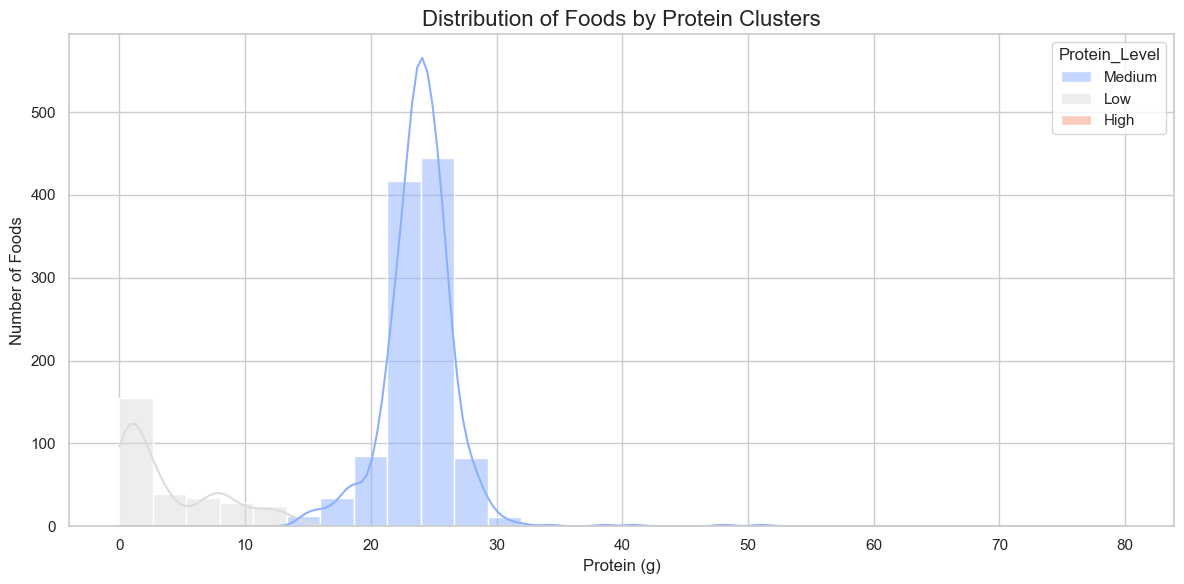

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=protein_data,
    x="Protein (g)",
    hue="Protein_Level",
    bins=30,
    palette="coolwarm",
    kde=True
)
plt.title("Distribution of Foods by Protein Clusters", fontsize=16)
plt.xlabel("Protein (g)")
plt.ylabel("Number of Foods")
plt.tight_layout()
plt.show()


In [22]:
display(Markdown("### Visualization: Protein Clusters\n\nThe histogram above shows how foods are grouped into **low**, **medium**, and **high** protein levels. Clustering helps simplify large datasets by grouping similar items together, which is useful for nutritional classification."))


### Visualization: Protein Clusters

The histogram above shows how foods are grouped into **low**, **medium**, and **high** protein levels. Clustering helps simplify large datasets by grouping similar items together, which is useful for nutritional classification.

In [23]:
# Count number of foods in each protein level
protein_counts = protein_data["Protein_Level"].value_counts().reset_index()
protein_counts.columns = ["Protein Level", "Count"]

# Display summary
from IPython.display import display, Markdown
display(Markdown("## Protein Level Summary\n\nBelow is the distribution of foods classified into Low, Medium, and High protein groups."))

display(protein_counts)


## Protein Level Summary

Below is the distribution of foods classified into Low, Medium, and High protein groups.

,Protein Level,Count
0,Medium,1092
1,Low,283
2,High,1


C:\Users\hp 1030 g2\AppData\Local\Temp\ipykernel_18200\898903467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=protein_counts, x="Protein Level", y="Count", palette=colors)


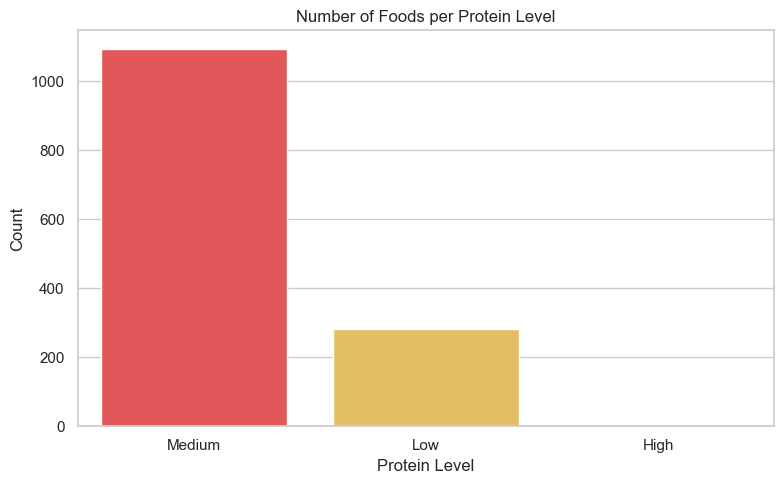

In [25]:
# Bar chart version
plt.figure(figsize=(8, 5))
sns.barplot(data=protein_counts, x="Protein Level", y="Count", palette=colors)
plt.title("Number of Foods per Protein Level")
plt.ylabel("Count")
plt.xlabel("Protein Level")
plt.tight_layout()
plt.show()


## 📌 Conclusion

In this data mining project, we explored the protein content of foods using the USDA FoodData Central Foundation dataset. We:

- Identified the top 10 most protein-dense foods.
- Compared average protein levels across food categories.
- Visualized protein variability using boxplots.
- Applied K-Means clustering to categorize foods as **Low**, **Medium**, or **High** in protein.
- Built a user-friendly, interactive dashboard to explore food categories.
- Trained a machine learning model (Random Forest) to predict protein content.

This project showcases how real-world nutritional data can be mined and modeled to support health decisions, food development, and personalized dietary planning.


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# Dropdown for category selection
category_dropdown = widgets.Dropdown(
    options=protein_data["Category"].unique(),
    description="Category:"
)

# Function to update the chart
def update_chart(selected_category):
    clear_output(wait=True)
    display(Markdown(f"## Protein Distribution: {selected_category}"))
    subset = protein_data[protein_data["Category"] == selected_category]
    
    plt.figure(figsize=(10, 5))
    sns.histplot(subset["Protein (g)"], bins=20, color='skyblue', kde=True)
    plt.title(f"Protein Distribution in {selected_category}")
    plt.xlabel("Protein (g)")
    plt.ylabel("Number of Foods")
    plt.tight_layout()
    plt.show()
    
    display(subset.sort_values(by="Protein (g)", ascending=False).head(5)[["Food Name", "Protein (g)"]])

# Interactive link
widgets.interact(update_chart, selected_category=category_dropdown);


interactive(children=(Dropdown(description='Category:', options=('Beef Products', 'Legumes and Legume Products…

In [31]:
import pandas as pd

protein_data = pd.read_csv("protein_data.csv")
protein_data.head()


,Food Name,Protein (g),Category,Protein_Cluster,Protein_Level
0,"Proximates, Beef, Eye of Round roast/steak, le...",23.4,Beef Products,0,Medium
1,"Proximates, Beef, Eye of Round roast/steak, le...",23.9,Beef Products,0,Medium
2,"Proximates, Beef, Eye of Round roast/steak, le...",23.5,Beef Products,0,Medium
3,"Proximates, Beef, Eye of Round roast/steak, le...",23.8,Beef Products,0,Medium
4,"Proximates, Beef, Eye of Round roast/steak, le...",23.8,Beef Products,0,Medium


In [32]:
import re

def clean_food_name(name):
    name = name.lower()  # lowercase
    name = re.sub(r'[^a-z0-9\s]', '', name)  # remove punctuation, keep letters, numbers, spaces
    # You can add more cleaning rules here if needed
    return name.strip()

protein_data['Food_Name_Clean'] = protein_data['Food Name'].apply(clean_food_name)
protein_data[['Food Name', 'Food_Name_Clean']].head()


,Food Name,Food_Name_Clean
0,"Proximates, Beef, Eye of Round roast/steak, le...",proximates beef eye of round roaststeak lean o...
1,"Proximates, Beef, Eye of Round roast/steak, le...",proximates beef eye of round roaststeak lean o...
2,"Proximates, Beef, Eye of Round roast/steak, le...",proximates beef eye of round roaststeak lean o...
3,"Proximates, Beef, Eye of Round roast/steak, le...",proximates beef eye of round roaststeak lean o...
4,"Proximates, Beef, Eye of Round roast/steak, le...",proximates beef eye of round roaststeak lean o...


In [33]:
def clean_food_name(name):
    name = name.lower()
    # Replace punctuation and special chars with space
    name = re.sub(r'[^a-z0-9\s]', ' ', name)  
    # Replace multiple spaces with a single space
    name = re.sub(r'\s+', ' ', name)
    return name.strip()


In [36]:
print("Before grouping:", protein_data.shape)

protein_data_grouped = protein_data.groupby('Food_Name_Clean').agg({
    'Protein (g)': 'mean'  # Average protein for duplicates
}).reset_index()

print("After grouping:", protein_data_grouped.shape)
protein_data_grouped.head()


Before grouping: (1376, 6)
After grouping: (1295, 2)


,Food_Name_Clean,Protein (g)
0,almond butter creamy,20.787340
1,almond milk unsweetened plain refrigerated,0.656250
2,almond milk unsweetened plain shelf stable,0.554688
3,apple juice with added vitamin c from concentr...,0.085938
4,apples fuji with skin raw,0.149219


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np

# Assume protein_data_grouped['Food_Name_Clean'] is cleaned properly

# Features and target
X = protein_data_grouped['Food_Name_Clean']
y = protein_data_grouped['Protein (g)']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Random Forest regressor with 200 trees and max_depth to control overfitting
model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train_vec, y_train)

# Predict and evaluate on test set
y_pred = model.predict(X_test_vec)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Model Trained Successfully")
print(f"🔍 RMSE: {rmse:.3f}")
print(f"📈 R² Score: {r2:.3f}")

# Save the trained model and vectorizer
joblib.dump(model, "protein_rf_foodname_model.joblib")
joblib.dump(vectorizer, "protein_foodname_vectorizer.joblib")
print("💾 Model and vectorizer saved!")


✅ Model Trained Successfully
🔍 RMSE: 2.894
📈 R² Score: 0.856
💾 Model and vectorizer saved!
